<a href="https://colab.research.google.com/github/jhmoon19/class2021Spring/blob/main/5_1_%EC%98%81%EC%9D%8C%EC%9D%91_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목적: 모음 코딩으로 만들기- source/filter 이해 (generation)
# 스펙트로그램 만들기 (analysis)

In [46]:
%matplotlib inline 
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

# 1. Puretone 만들기 - Phasor

## 1) 변수 설정 

In [47]:
amp = 1       # range [0.0, 1.0]
sr = 10000    # sampling rate, Hz
dur = 0.5     # in seconds
freq = 100.0  # sine frequency, Hz

## 2) 시간 만들기

In [48]:
t = np.arange(1, sr*dur+1)/sr

잘라서 시간을 만든다. 0.1 0.2 0.3 ... 1초 / 0.01 0.02 0.03 ... / 아님 더 빽빽하게 

빽빽함 결정하는 것 -> sampling rate 

1초 안에 타임 틱이 몇개 들어가는 게 설정하는 것: "sr = 10000"

ex. sr=10000 -> 1초 안에 10000개 만들 정도로 빽빽하게 잘게 쪼개라 

이걸 리스트에 만들려고 하는것. t = [0.0001, 0.0002, 0.0003 ....] 

- 식으로 만들어주기 위해 t = np.arange()

ex. np.arange(1,10): [1,2,3,4,5,6,7,8,9] 

np.arange(1, sr+1): [1,2,3,4,5... 10000]/10000

-> [0.0001, 0.0002, 0.0003 ... 1]

np.arange(1, sr*0.5 +1)/sr -> [0.0001, 0.0002, ...0.5000] (dur 0.5초까지)

### t에 [0 ... 0.5] 

## 3) phase(각도) 만들기 -> 반드시 시간과 연계해서 만듦. (t*)

In [49]:
theta = t*2*np.pi * freq

2파이: 360도 -> 한바퀴 도는 것 

2파이*100 -> 100번 돌아라 

지금은 0.5초에 50번 돌고 있느 것 

## 4) sin()에 theta 넣기 

In [50]:
s = np.sin(theta)

sin값이 만들어진 것. 

## 5) 플랏팅(plotting): pure tone(sin곡선) 만들어내는 것 = phasor

Text(0, 0.5, 'real')

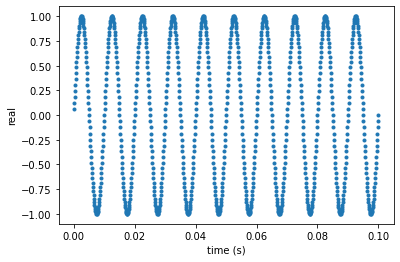

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

plot(x, y): x(시간값 t), y(sin값) 

plot(t,s) -> 엄청 빽빽하게 나옴(양이너무많아서) -> 몇개만 해보자 

t는 지금 5천개(dur 0.5니까) -> plot(t[0:1000],s[0:1000]) -> 1000개까지만  

다양한 pure tone 만들기 -> source가 됨. 

### sin(theta) = e의 theta*i 승 

e도 i도 숫자(상수)

e: 2.71*** , i: 복소수 

복소수: a+ bi(루트 -1) -> b가 0이 아니면 허수/0이면 실수 -> 합쳐서 복소수 

실수 수직선 -1 0 1 2 ... -> 허수(복소수)를 그래프상에 어떻게 나타낼까?

### [복소수의 공간적인 표현방법]

복소수(a+bi)-> a(real값 R), b(imagination값 Im) ex. 1 + 2i

x축을 R로, y축을 Im으로 -> (1,2)지점 찍기 

R축에서만 실수부분인것. 그외에는 허수부분 (실수는 일차원/ 복소수는 이차원)

e의 theta*i승 -> ex. e의 20파이i/ e의 2분의3파이i --> 무조건 복소수이다. (o) 

--> 반드시 a+bi 형태로 표현이 가능하다. 

In [52]:
theta = np.pi #(180도)
np.sin(theta) # 1.224646....e-16(0.00000... )-> 유효숫자 개념 
# sin(180도) = 0 

# np.exp(theta*1j)

1.2246467991473532e-16

In [53]:
theta = np.pi/2
np.sin(theta)
# sin(90도) = 1.0

1.0

In [54]:
theta = np.pi/6
np.sin(theta)
# sin(30도) = 0.5

0.49999999999999994

In [55]:
# np.sin(theta) = np.exp(theta*1j) -> i=1j 
theta = np.pi/2
np.exp(theta*1j)

(6.123233995736766e-17+1j)

In [56]:
theta = np.pi*0 # 0 90 180 270 360 (0 pi/2 pi 3pi/2 2pi)
np.exp(theta*1j)
# (1+0j) -> (1,0)

(1+0j)

In [57]:
theta = np.pi/2 # 0 90 180 270 360 (0 pi/2 pi 3pi/2 2pi)
np.exp(theta*1j)
# 0.0000... + 1j -> (0,1)

(6.123233995736766e-17+1j)

In [58]:
theta = np.pi # 0 90 180 270 360 (0 pi/2 pi 3pi/2 2pi)
np.exp(theta*1j)
# (-1, 0)

(-1+1.2246467991473532e-16j)

In [59]:
theta = np.pi*3/2 # 0 90 180 270 360 (0 pi/2 pi 3pi/2 2pi)
np.exp(theta*1j)
# (0,-1)

(-1.8369701987210297e-16-1j)

규칙성: 0도 90도 180도 270도 ...-> 원이 만들어짐 

e의 theta*i승 -> 복소수의 표현방식으로 규칙성 발견 

In [60]:
ipd.Audio(s, rate=sr)
# 100Hz짜리 소리

In [61]:
# generate signal by complex-phasor(복소수)
c = np.exp(theta*1j)

### complex phasor(복소수) 곡선

### 실수부분-> 코싸인 (y축)

### 허수부분-> 싸인 곡선 (z축)

### 동시에 3차원에서 갖고있음. 

IndexError: ignored

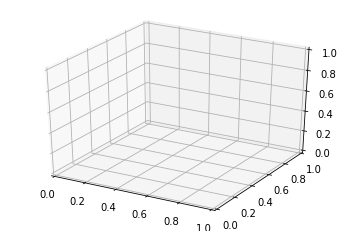

In [62]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [63]:
amp =1 
sr =10000
dur = 0.5
freq = 100.0

In [64]:
t= np.arange(1, sr*dur+1)/sr

In [65]:
theta = t*2*np.pi * freq

In [66]:
s=np.sin(theta)

In [67]:
c= np.exp(theta*1j)

Text(0.5, 0, 'imag')

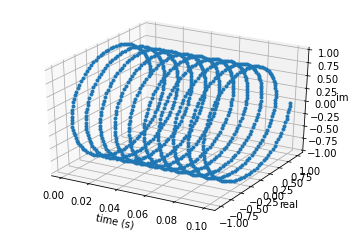

In [68]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [69]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:1000], c.real[0:1000], c.imag[0:1000]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode = 'markers', marker=dict(size=3))])
fig.show()

In [70]:
ipd.Audio(s, rate=sr)